In [8]:
!cp /content/kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import kaggle
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge
!unzip ./challenges-in-representation-learning-facial-expression-recognition-challenge.zip
!tar -xvzf ./fer2013.tar.gz
!git clone https://github.com/microsoft/FERPlus.git
!python3 ./FERPlus/src/generate_training_data.py -d ./FERPlus/data -fer ./fer2013/fer2013.csv -ferplus ./FERPlus/fer2013new.csv

 96% 274M/285M [00:01<00:00, 152MB/s] 
100% 285M/285M [00:01<00:00, 154MB/s]
Archive:  ./challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               
fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
fatal: destination path 'FERPlus' already exists and is not an empty directory.
Start generating ferplus images.
Done...


In [9]:
# importing libraries for image ops
import matplotlib.pyplot as plt
import cv2

# pytorch libraries
import torch
import torchvision

# utilities
import os
from glob import glob
import pandas as pd

In [13]:
# image files
files = glob('./FERPlus/data/FER2013Test/*.png')

In [11]:
def read_image(file):
    """Reads the image file

    Returns the numpy array.

    Args:
        file : path to the image

    Returns:
        (numpy.ndarray): image read as numpy array
    """
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

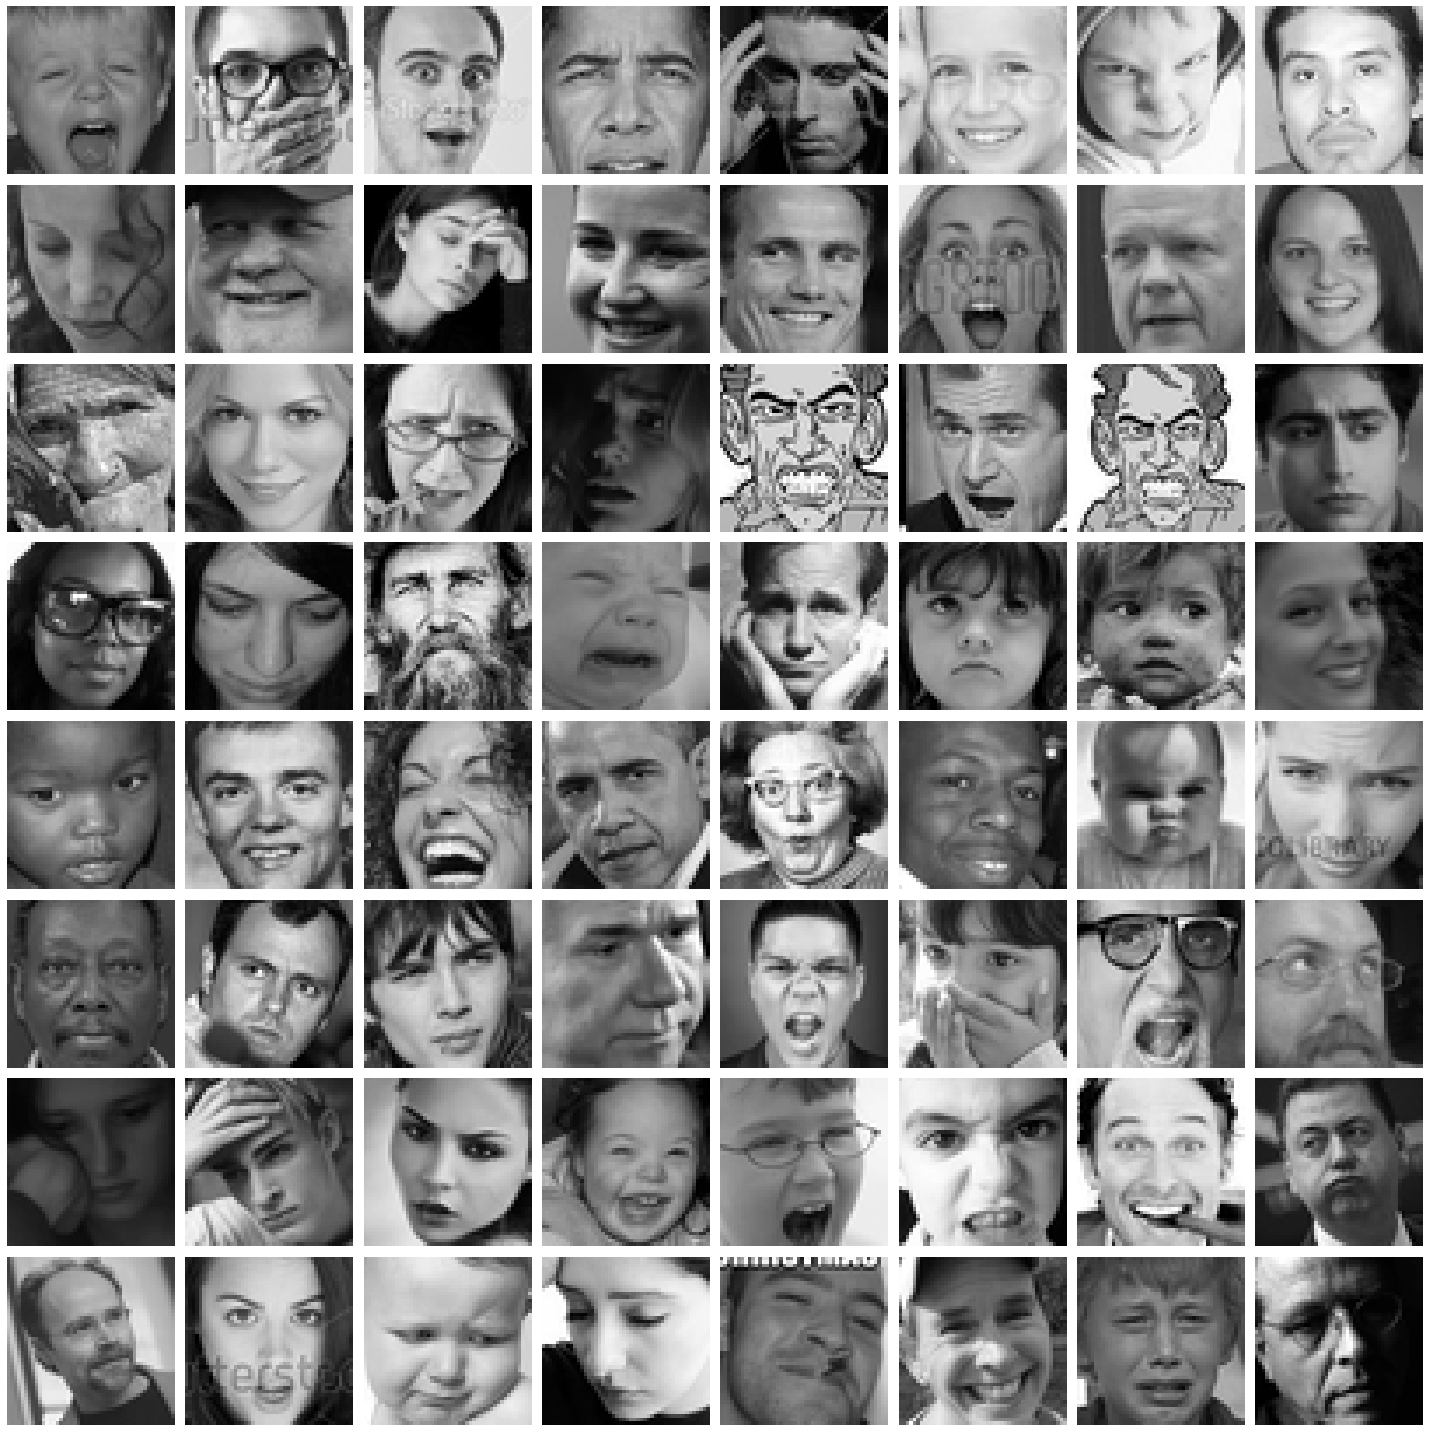

In [14]:
fig, axs = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(read_image(files[i]))
    ax.axis('off')
plt.tight_layout()

In [18]:
df = pd.read_csv('./FERPlus/data/FER2013Train/label.csv', header=None) # reading csv file

In [30]:
import numpy as np
a = [0, 1, 3, 0, 3, 1, 0]
(np.array(a) > 0).astype('float')

array([0., 1., 1., 0., 1., 1., 0.])

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from dataset import EmotionDataset

In [3]:
ds = EmotionDataset(root='/content/Dataset/FERPlus/data', split='valid')

In [9]:
!python3 /content/Emotion-Recognition/train.py --root_dir /content/FERPlus/data \
--finetune True --lr 1e-2

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
unfreeze: False
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNet            | 11.2 M
1 | loss_func | BCEWithLogitsLoss | 0     
------------------------------------------------
5.1 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
Epoch 0:  39% 218/558 [01:10<01:49,  3.11it/s, loss=0.561, v_num=2]/usr/local/lib/

In [ ]:
%tensorboard

In [6]:
from torchvision import models